In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI 
from langchain_core.messages import BaseMessage, HumanMessage
from dotenv import load_dotenv
from typing import TypedDict , Literal , Annotated
import os
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver
load_dotenv()

c:\Users\dell\Desktop\Langgraph-learning\agent\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.7) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
c:\Users\dell\Desktop\Langgraph-learning\agent\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash",temperature=0.5)

In [3]:
class JokeState(TypedDict):
    topic : str
    joke : str
    explanation : str

In [9]:
def generate_joke(state : JokeState):
    topic = state['topic']
    prompt = PromptTemplate(
        input_varaibles = ["topic"],
        template = "Create a hilarious joke on the topic: {topic}"
    )
    joke = llm.invoke(prompt.format(topic=topic)).content
    state['joke'] = joke
    return state

def explain_joke(state : JokeState):
    joke = state['joke']
    prompt = PromptTemplate(
        input_varaibles = ["joke"],
        template = "Explain the following joke: {joke}"
    )
    explanation = llm.invoke(prompt.format(joke=joke)).content
    state['explanation'] = explanation
    return state

In [15]:
Graph = StateGraph(JokeState)
Graph.add_node("Generate Joke",generate_joke)
Graph.add_node("Explain Joke",explain_joke)
Graph.add_edge(START,"Generate Joke")
Graph.add_edge("Generate Joke","Explain Joke")
Graph.add_edge("Explain Joke",END)
check = InMemorySaver()
workflow = Graph.compile(checkpointer = check)

In [17]:
config = {'configurable' : {'thread_id': 1}}
initial_state = {'topic' : 'pizza'}
final_state = workflow.invoke(initial_state , config = config)

In [19]:
print(final_state['joke'])

I went to a support group for pizza addicts last night.

It was great! We even ordered three large pies for the meeting.


In [20]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'pizza', 'joke': 'I went to a support group for pizza addicts last night.\n\nIt was great! We even ordered three large pies for the meeting.', 'explanation': 'This joke plays on the **irony** and **subversion of expectations**.\n\nHere\'s why it\'s funny:\n\n1.  **What a Support Group Is For:** A support group is typically a place where people with a common problem or addiction gather to help each other *overcome* that problem. For "pizza addicts," the expectation would be that they are trying to *reduce* or *stop* their excessive pizza consumption.\n\n2.  **The Punchline\'s Contradiction:** The punchline, "We even ordered three large pies for the meeting," completely contradicts the purpose of such a group. Instead of abstaining or discussing strategies to avoid pizza, they are actively engaging in the very behavior they are supposedly trying to overcome, and doing so in a significant way (three large pies!).\n\n3.  **The Humor:** The humor comes from th

In [21]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'I went to a support group for pizza addicts last night.\n\nIt was great! We even ordered three large pies for the meeting.', 'explanation': 'This joke plays on the **irony** and **subversion of expectations**.\n\nHere\'s why it\'s funny:\n\n1.  **What a Support Group Is For:** A support group is typically a place where people with a common problem or addiction gather to help each other *overcome* that problem. For "pizza addicts," the expectation would be that they are trying to *reduce* or *stop* their excessive pizza consumption.\n\n2.  **The Punchline\'s Contradiction:** The punchline, "We even ordered three large pies for the meeting," completely contradicts the purpose of such a group. Instead of abstaining or discussing strategies to avoid pizza, they are actively engaging in the very behavior they are supposedly trying to overcome, and doing so in a significant way (three large pies!).\n\n3.  **The Humor:** The humor comes from t

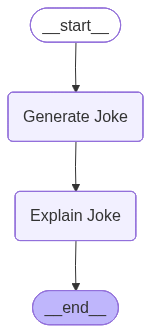

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [23]:
config2 = {'configurable' : {'thread_id': 2}}
initial_state = {'topic' : 'pasta'}
final_state = workflow.invoke(initial_state , config = config2)

In [24]:
print(final_state['joke'])

Why did the pasta get sent to the principal's office?

Because it was an **impasta**!


In [26]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta get sent to the principal's office?\n\nBecause it was an **impasta**!", 'explanation': 'This is a classic pun!\n\nThe humor comes from the wordplay between **"impasta"** and **"impostor."**\n\nLet\'s break it down:\n\n1.  **The Wordplay:** "Impasta" is a made-up word that sounds exactly like "impostor."\n2.  **What "Impostor" Means:** An impostor is someone who pretends to be someone else in order to deceive, or someone who is not what they claim to be; a fake or a fraud.\n3.  **Connecting it to the Joke:** In the context of the joke, the "impasta" (pasta acting like an impostor) is implied to have done something wrong, deceptive, or misbehaved, which is why it would be sent to the principal\'s office.\n\nSo, the pasta got in trouble because it was being a "fake" or a "fraud," just like an impostor, but with a pasta-themed twist!'}, next=(), config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id':

##
Concept of Time Travel

In [27]:
workflow.get_state({'configurable' : {'thread_id' : 2 , 'checkpoint_id' : '1f0e6175-4d02-65cc-8000-211b66304223'}})

StateSnapshot(values={'topic': 'pasta'}, next=('Generate Joke',), config={'configurable': {'thread_id': 2, 'checkpoint_id': '1f0e6175-4d02-65cc-8000-211b66304223'}}, metadata={'source': 'loop', 'writes': None, 'step': 0, 'parents': {}}, created_at='2025-12-31T07:07:13.004897+00:00', parent_config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1f0e6175-4cf3-6c02-bfff-6368ae222786'}}, tasks=(PregelTask(id='7d7df00b-a0e2-b645-7b6d-909ba7fcd10f', name='Generate Joke', path=('__pregel_pull', 'Generate Joke'), error=None, interrupts=(), state=None, result={'topic': 'pasta', 'joke': "Why did the pasta get sent to the principal's office?\n\nBecause it was an **impasta**!"}),))

In [28]:
workflow.invoke(None,config={'configurable' : {'thread_id' : 2 , 'checkpoint_id' : '1f0e6175-4d02-65cc-8000-211b66304223'}})

{'topic': 'pasta',
 'joke': "Why did the pasta get called to the principal's office?\n\nBecause it was an **impasta**!",
 'explanation': 'This is a classic pun joke! Here\'s why it\'s funny:\n\n1.  **"Impasta"** sounds exactly like the word **"imposter."**\n2.  An **imposter** is someone who pretends to be someone else, or something they are not, often with deceptive intent.\n3.  People who are imposters usually get into trouble when they\'re found out, which is why they might end up in a principal\'s office (or a similar place of authority).\n\nSo, the humor comes from the silly wordplay, imagining a piece of pasta literally being an "imposter" and getting in trouble for it.'}

In [29]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta get called to the principal's office?\n\nBecause it was an **impasta**!", 'explanation': 'This is a classic pun joke! Here\'s why it\'s funny:\n\n1.  **"Impasta"** sounds exactly like the word **"imposter."**\n2.  An **imposter** is someone who pretends to be someone else, or something they are not, often with deceptive intent.\n3.  People who are imposters usually get into trouble when they\'re found out, which is why they might end up in a principal\'s office (or a similar place of authority).\n\nSo, the humor comes from the silly wordplay, imagining a piece of pasta literally being an "imposter" and getting in trouble for it.'}, next=(), config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1f0e63fc-2279-6c10-8002-006a5615c6f9'}}, metadata={'source': 'loop', 'writes': {'Explain Joke': {'topic': 'pasta', 'joke': "Why did the pasta get called to the principal's office?\n\nBecause it was an **

Updating the State

In [32]:
workflow.update_state({'configurable' : {'thread_id' : 2 , 'checkpoint_id' : '1f0e6175-4d02-65cc-8000-211b66304223','checkpoint_ns': ''}},{'topic':'chowmein'})

{'configurable': {'thread_id': 2,
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e641b-2010-6c1e-8001-a74af8568bb9'}}

In [33]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'chowmein'}, next=('Generate Joke',), config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1f0e641b-2010-6c1e-8001-a74af8568bb9'}}, metadata={'source': 'update', 'step': 1, 'writes': {'__start__': {'topic': 'chowmein'}}, 'parents': {}}, created_at='2025-12-31T12:10:28.216118+00:00', parent_config={'configurable': {'thread_id': 2, 'checkpoint_ns': '', 'checkpoint_id': '1f0e6175-4d02-65cc-8000-211b66304223'}}, tasks=(PregelTask(id='94510892-2308-db7e-39b1-f7bf7dd819af', name='Generate Joke', path=('__pregel_pull', 'Generate Joke'), error=None, interrupts=(), state=None, result=None),)),
 StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta get called to the principal's office?\n\nBecause it was an **impasta**!", 'explanation': 'This is a classic pun joke! Here\'s why it\'s funny:\n\n1.  **"Impasta"** sounds exactly like the word **"imposter."**\n2.  An **imposter** is someone who pretends to be someone else, or some